In [18]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import re
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)

returns_folder_name = "returns"
    
ts_list = []
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

In [5]:
all_returns_df

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.000634,-0.000765,0.0,-0.000580,-0.000206,0.0,0.0,-0.001066,0.000000,...,-0.000347,0.000944,0.0,0.000000,0.000000,0.000000,0.000748,0.000196,0.000000,0.000000
2,-0.000486,-0.000634,-0.000343,0.0,-0.000088,-0.000012,0.0,0.0,0.000000,-0.000929,...,-0.002173,-0.003374,0.0,0.000000,0.000000,0.000000,-0.000187,0.000196,-0.000542,0.000000
3,-0.000049,-0.000423,0.000079,0.0,-0.000112,-0.000163,0.0,0.0,-0.000533,0.000186,...,-0.000174,0.000135,0.0,0.001089,0.000000,0.000000,-0.000187,0.000000,0.000000,0.000000
4,0.000340,0.000000,0.000330,0.0,0.001232,0.001171,0.0,0.0,0.000000,-0.000186,...,0.000348,-0.001082,0.0,-0.000363,0.000000,0.000000,-0.000374,0.000000,-0.002712,0.000441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,0.000098,0.000000,-0.000230,0.0,0.000316,0.000149,0.0,0.0,-0.000639,-0.000193,...,-0.000526,0.000813,0.0,0.000000,0.000000,0.000000,-0.000220,0.000000,0.000243,0.000000
21596,0.000098,0.000236,0.000650,0.0,0.000085,0.000226,0.0,0.0,0.000000,0.001155,...,0.000438,0.000542,0.0,0.000000,0.000000,0.000000,0.000220,0.000000,0.000000,0.000000
21597,0.000293,0.000236,0.000419,0.0,0.000259,0.000190,0.0,0.0,0.000000,-0.000577,...,0.000175,0.000271,0.0,0.000000,0.000000,0.000323,0.000000,0.000000,0.000000,0.000000
21598,0.000488,0.000000,-0.000230,0.0,-0.000474,-0.000512,0.0,0.0,0.000000,0.000192,...,0.000438,0.000135,0.0,0.000000,0.002141,0.001292,0.000110,0.000000,0.000000,0.000000


In [27]:
increment = 5

In [28]:
squared_returns = all_returns_df.pow(2)

In [34]:
df_5 = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)

In [33]:
squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.000626,0.000991,0.000905,0.000000,0.001369,0.001200,0.000000,0.000000,0.001192,0.000965,...,0.002235,0.003669,0.0,0.001148,0.000000,0.000000,0.000877,0.000277,0.002766,0.000441
1,0.000437,0.000946,0.000481,0.000554,0.001079,0.001533,0.000000,0.000000,0.002323,0.001976,...,0.003011,0.002507,0.0,0.000363,0.001482,0.001284,0.001318,0.000618,0.006624,0.000000
2,0.000385,0.000792,0.001047,0.000783,0.000877,0.000968,0.000000,0.000000,0.001191,0.000872,...,0.001732,0.001521,0.0,0.000726,0.002092,0.000000,0.000553,0.000437,0.004381,0.000000
3,0.000412,0.000300,0.000552,0.000000,0.001116,0.001230,0.000000,0.000696,0.001924,0.003505,...,0.002317,0.000489,0.0,0.000000,0.001479,0.001212,0.000553,0.001171,0.004245,0.000000
4,0.000460,0.000212,0.000814,0.000000,0.001135,0.001367,0.000969,0.000127,0.000926,0.001700,...,0.000707,0.000429,0.0,0.000726,0.000000,0.000303,0.000831,0.000976,0.000853,0.002214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.000346,0.001026,0.000276,0.000854,0.001070,0.001198,0.000000,0.000000,0.000638,0.000838,...,0.001091,0.001195,0.0,0.001006,0.000000,0.000000,0.000529,0.001456,0.000773,0.000000
4316,0.000611,0.000816,0.000694,0.001511,0.001221,0.001824,0.000000,0.000000,0.001277,0.000639,...,0.001362,0.000575,0.0,0.000000,0.000000,0.000458,0.000942,0.001810,0.000489,0.000000
4317,0.000343,0.000943,0.000694,0.001514,0.000456,0.000551,0.001057,0.001180,0.000000,0.000385,...,0.001544,0.000636,0.0,0.002686,0.001514,0.000324,0.001305,0.000000,0.000914,0.000000
4318,0.000508,0.000667,0.000405,0.000677,0.000566,0.000559,0.001058,0.000000,0.000639,0.000771,...,0.001195,0.001206,0.0,0.000000,0.000000,0.000723,0.000714,0.000000,0.003451,0.000000


In [36]:
df_5.corr()

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
bnbbtc,1.000000,0.351803,0.493919,0.144880,0.608753,0.610054,0.248341,0.522651,0.288744,0.337222,...,0.178006,0.216128,0.161215,0.083956,0.277624,0.291034,0.323765,0.258809,0.094184,0.110801
adabtc,0.351803,1.000000,0.395345,0.129382,0.464941,0.460491,0.222910,0.355716,0.312904,0.301277,...,0.165052,0.254875,0.159112,0.072734,0.234882,0.291261,0.321444,0.250592,0.110397,0.081733
ethbtc,0.493919,0.395345,1.000000,0.117097,0.600891,0.602511,0.250573,0.481524,0.323276,0.340879,...,0.190044,0.253388,0.193620,0.048869,0.257868,0.268119,0.336194,0.259345,0.127634,0.109273
batbtc,0.144880,0.129382,0.117097,1.000000,0.119405,0.124504,0.180839,0.126161,0.163087,0.126956,...,0.067446,0.105491,0.149329,0.142491,0.088681,0.175060,0.192356,0.128443,0.089446,0.109599
btcusdc,0.608753,0.464941,0.600891,0.119405,1.000000,0.974028,0.259895,0.690986,0.358648,0.401746,...,0.219324,0.269167,0.183549,0.082256,0.286741,0.336395,0.364510,0.297017,0.164727,0.160188
btcusdt,0.610054,0.460491,0.602511,0.124504,0.974028,1.000000,0.261480,0.685525,0.352805,0.400039,...,0.216823,0.269019,0.182594,0.084629,0.292483,0.337026,0.364265,0.298434,0.166212,0.156930
neobtc,0.248341,0.222910,0.250573,0.180839,0.259895,0.261480,1.000000,0.248310,0.271431,0.235210,...,0.087053,0.156123,0.309223,0.073847,0.220068,0.265819,0.268462,0.250140,0.099026,0.111409
btctusd,0.522651,0.355716,0.481524,0.126161,0.690986,0.685525,0.248310,1.000000,0.307818,0.336220,...,0.184671,0.191007,0.183084,0.051588,0.241475,0.264054,0.296810,0.237910,0.094687,0.112365
etcbtc,0.288744,0.312904,0.323276,0.163087,0.358648,0.352805,0.271431,0.307818,1.000000,0.264918,...,0.104513,0.204088,0.241366,0.052610,0.199439,0.286124,0.340893,0.268734,0.080521,0.055486
ltcbtc,0.337222,0.301277,0.340879,0.126956,0.401746,0.400039,0.235210,0.336220,0.264918,1.000000,...,0.116322,0.190615,0.166474,0.055512,0.246451,0.256294,0.267961,0.272434,0.078834,0.069672


In [22]:
def compute_vol_corr_df(input_df, increments_list):
    corr_series_list = []
    squared_returns = all_returns_df.pow(2)
    for increment in increments_list:
        df = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)
#         df = input_df.groupby(input_df.index // increment).sum()
        corr_matrix = df.corr()
        upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        corr_series = corr_matrix.where(upper_mask).stack()
        corr_series.rename(increment, inplace=True)
#         info_string = f"pairwise |corr(log returns)|, increment = {increment} minute(s)"
        corr_series_list.append(corr_series)
    return pd.concat(corr_series_list, axis=1)

array([[<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 1 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 5 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 20 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 60 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 120 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 240 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 720 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 1400 minute(s)'}, ylabel='Frequency'>]],
      dtype=object)

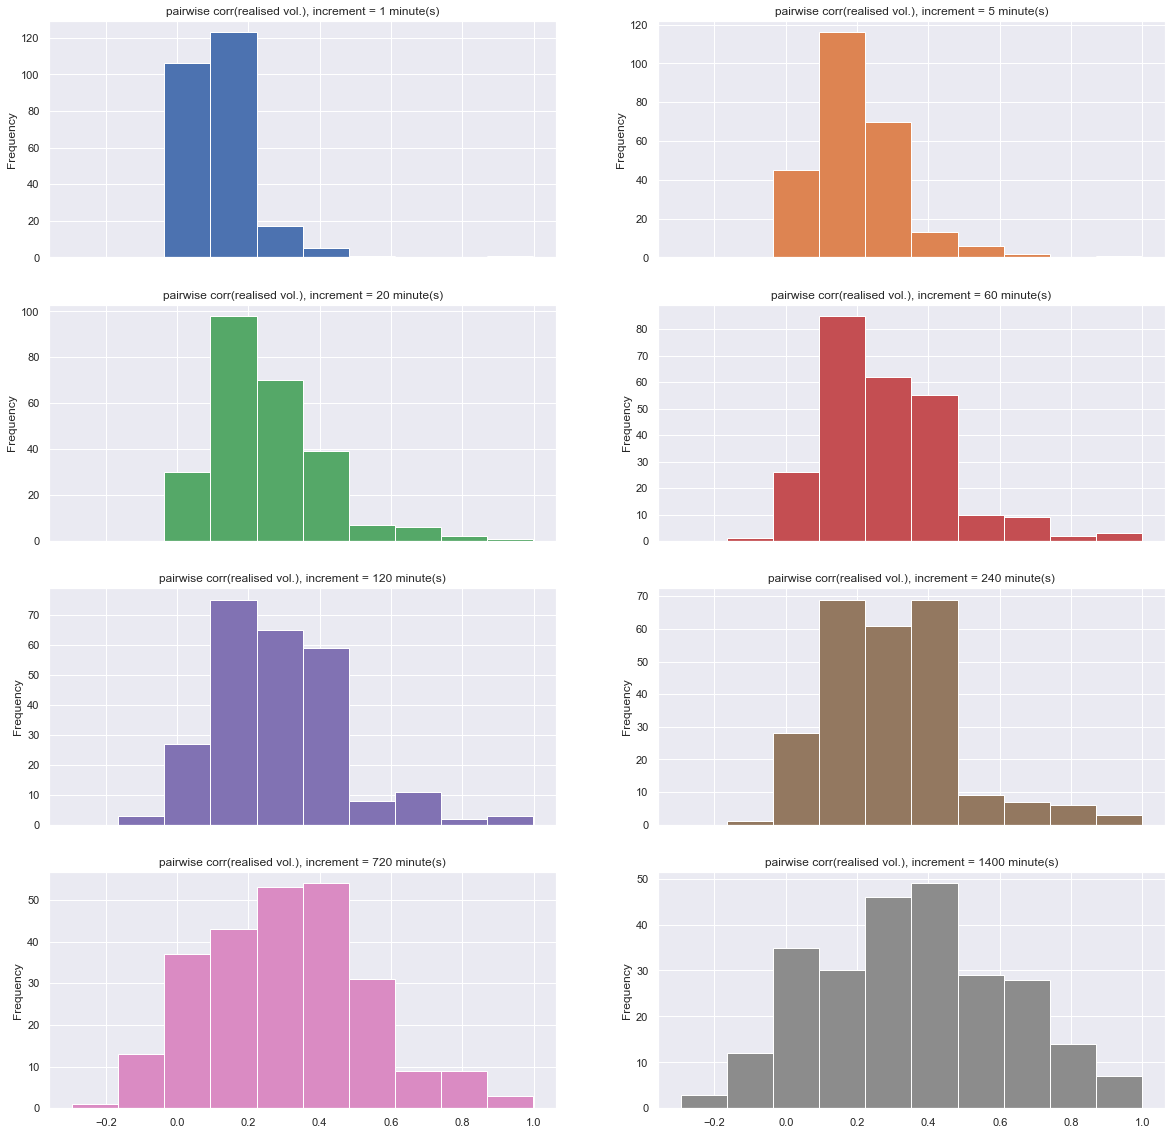

In [37]:
increments_list = [1, 5, 20, 60, 120, 240, 720, 1400,]
sns.set_context('paper')
sns.set(rc={'figure.figsize':(20,20)}) 

df = compute_vol_corr_df(all_returns_df, increments_list)

info_string_list = [f"pairwise corr(realised vol.), increment = {increment} minute(s)" for increment in increments_list]

df.plot.hist(subplots=True, legend=False, layout=(4,2), title=info_string_list)

In [24]:
df.mean()

1       0.126040
5       0.201669
20      0.253670
60      0.280241
120     0.283968
240     0.299497
720     0.306526
1400    0.357383
dtype: float64

In [ ]:
def compute_vol_corr_df(input_df, increments_list):
    corr_series_list = []
    squared_returns = all_returns_df.pow(2)
    for increment in increments_list:
        df = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)
#         df = input_df.groupby(input_df.index // increment).sum()
        corr_matrix = df.corr()
        upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        corr_series = corr_matrix.where(upper_mask).stack()
        corr_series.rename(increment, inplace=True)
#         info_string = f"pairwise |corr(log returns)|, increment = {increment} minute(s)"
        corr_series_list.append(corr_series)
    return pd.concat(corr_series_list, axis=1)

In [38]:
increment = 5
squared_returns = all_returns_df.pow(2)
volatilities = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)


In [39]:
volatilities

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.000626,0.000991,0.000905,0.000000,0.001369,0.001200,0.000000,0.000000,0.001192,0.000965,...,0.002235,0.003669,0.0,0.001148,0.000000,0.000000,0.000877,0.000277,0.002766,0.000441
1,0.000437,0.000946,0.000481,0.000554,0.001079,0.001533,0.000000,0.000000,0.002323,0.001976,...,0.003011,0.002507,0.0,0.000363,0.001482,0.001284,0.001318,0.000618,0.006624,0.000000
2,0.000385,0.000792,0.001047,0.000783,0.000877,0.000968,0.000000,0.000000,0.001191,0.000872,...,0.001732,0.001521,0.0,0.000726,0.002092,0.000000,0.000553,0.000437,0.004381,0.000000
3,0.000412,0.000300,0.000552,0.000000,0.001116,0.001230,0.000000,0.000696,0.001924,0.003505,...,0.002317,0.000489,0.0,0.000000,0.001479,0.001212,0.000553,0.001171,0.004245,0.000000
4,0.000460,0.000212,0.000814,0.000000,0.001135,0.001367,0.000969,0.000127,0.000926,0.001700,...,0.000707,0.000429,0.0,0.000726,0.000000,0.000303,0.000831,0.000976,0.000853,0.002214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.000346,0.001026,0.000276,0.000854,0.001070,0.001198,0.000000,0.000000,0.000638,0.000838,...,0.001091,0.001195,0.0,0.001006,0.000000,0.000000,0.000529,0.001456,0.000773,0.000000
4316,0.000611,0.000816,0.000694,0.001511,0.001221,0.001824,0.000000,0.000000,0.001277,0.000639,...,0.001362,0.000575,0.0,0.000000,0.000000,0.000458,0.000942,0.001810,0.000489,0.000000
4317,0.000343,0.000943,0.000694,0.001514,0.000456,0.000551,0.001057,0.001180,0.000000,0.000385,...,0.001544,0.000636,0.0,0.002686,0.001514,0.000324,0.001305,0.000000,0.000914,0.000000
4318,0.000508,0.000667,0.000405,0.000677,0.000566,0.000559,0.001058,0.000000,0.000639,0.000771,...,0.001195,0.001206,0.0,0.000000,0.000000,0.000723,0.000714,0.000000,0.003451,0.000000


In [40]:
ticks = 1440 / increment

In [43]:
ticks

288.0

In [47]:
volatilities.index % ticks

Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,
                9.0,
              ...
              278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0,
              287.0],
             dtype='float64', length=4320)

In [49]:
diurnal_volatilities = volatilities.groupby(volatilities.index % ticks).mean()

<AxesSubplot:>

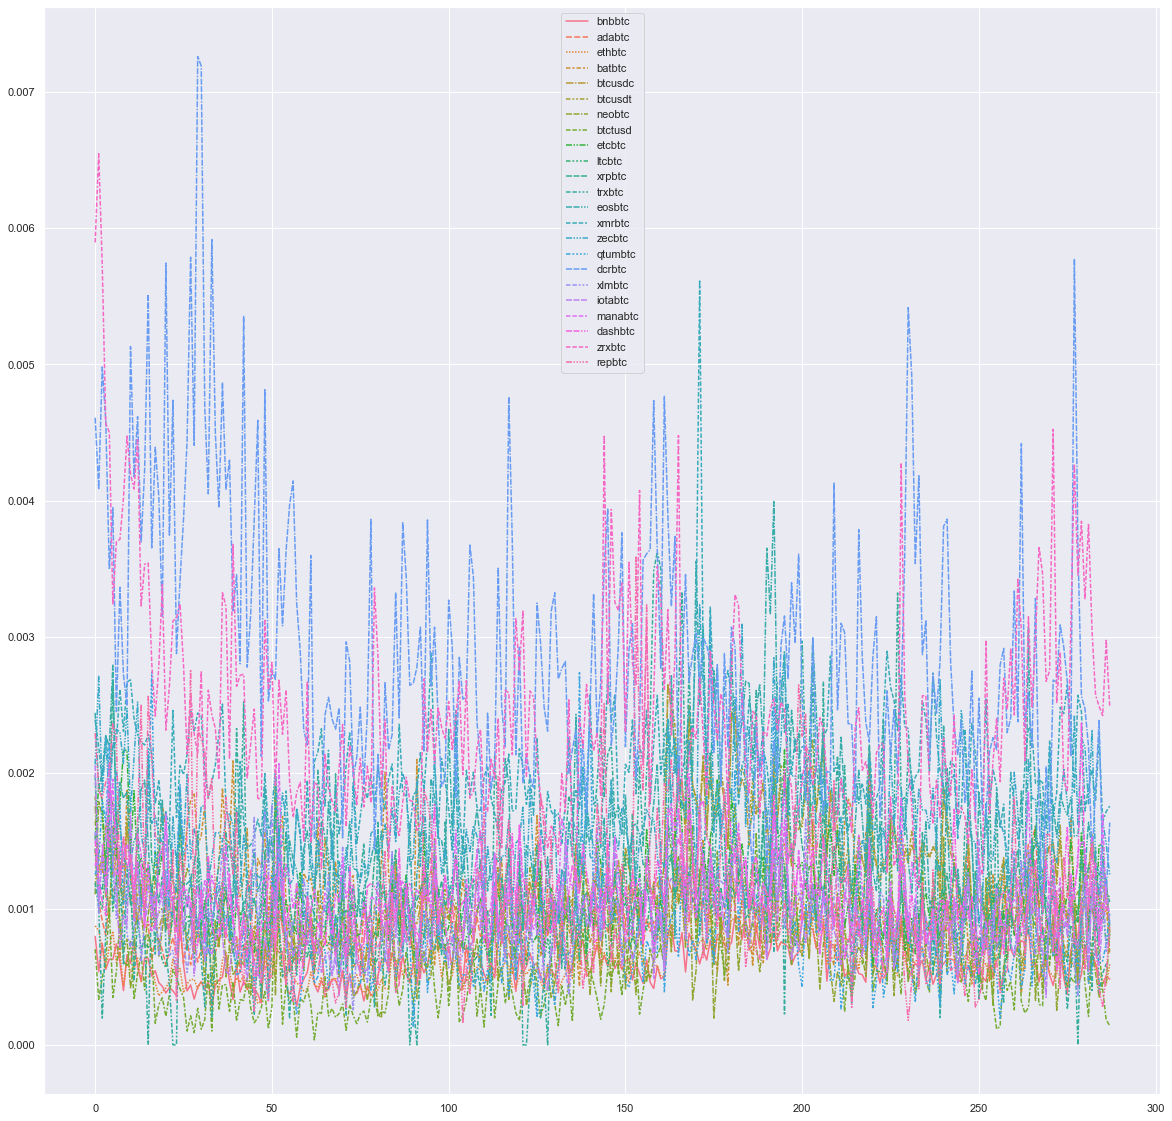

In [52]:
sns.lineplot(data=diurnal_volatilities)

In [59]:
time_of_day = pd.DatetimeIndex(diurnal_volatilities.index * increment * 60 * 10 ** 9)

In [104]:
time_of_day = (diurnal_volatilities.index.to_series() * increment * 60).astype(int).apply(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%H:%M'))

In [107]:
timed_diurnal_volatilities = pd.concat([diurnal_volatilities, time_of_day], axis=1)

In [109]:
timed_diurnal_volatilities

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc,0
0.0,0.000798,0.001438,0.000875,0.001642,0.001753,0.001828,0.001106,0.000704,0.001508,0.001443,...,0.002060,0.001252,0.004609,0.001565,0.002056,0.001313,0.001498,0.005896,0.002291,00:00
1.0,0.000538,0.001048,0.000841,0.001326,0.001266,0.001364,0.001787,0.000334,0.001913,0.001084,...,0.002708,0.001341,0.004088,0.000967,0.001046,0.001482,0.001211,0.006548,0.001873,00:05
2.0,0.000746,0.000913,0.000707,0.001263,0.001376,0.001398,0.001684,0.000498,0.001793,0.000999,...,0.001830,0.001801,0.004981,0.001405,0.001418,0.001473,0.001055,0.005731,0.001811,00:10
3.0,0.000555,0.000803,0.000570,0.001617,0.001086,0.001156,0.001273,0.000606,0.001290,0.001303,...,0.002248,0.001628,0.004581,0.001128,0.001530,0.001170,0.000951,0.004565,0.001932,00:15
4.0,0.000630,0.001072,0.000719,0.001545,0.001535,0.001570,0.000926,0.001010,0.001866,0.001450,...,0.001794,0.002219,0.003492,0.001316,0.002071,0.001517,0.001940,0.004502,0.001988,00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.000592,0.000838,0.000593,0.000654,0.001277,0.001311,0.000528,0.001012,0.000929,0.000754,...,0.001310,0.000695,0.001890,0.000984,0.000668,0.001043,0.001335,0.002570,0.000768,23:35
284.0,0.000448,0.000941,0.000523,0.000773,0.001034,0.001086,0.000351,0.000703,0.001475,0.000838,...,0.001095,0.000604,0.002384,0.000753,0.000578,0.000875,0.000731,0.002488,0.000408,23:40
285.0,0.000452,0.000965,0.000471,0.001235,0.001018,0.000972,0.000455,0.000408,0.001463,0.000994,...,0.001651,0.000617,0.001305,0.001301,0.000921,0.001704,0.001037,0.002420,0.000277,23:45
286.0,0.000506,0.000988,0.000440,0.001031,0.001147,0.001222,0.000459,0.000185,0.001120,0.000745,...,0.001477,0.000745,0.001105,0.000680,0.001166,0.001004,0.001004,0.002973,0.000517,23:50


In [110]:
timed_diurnal_volatilities.rename(columns={0: 'time'}, inplace=True)

In [112]:
molten = timed_diurnal_volatilities.melt('time', var_name='assets', value_name='vols')

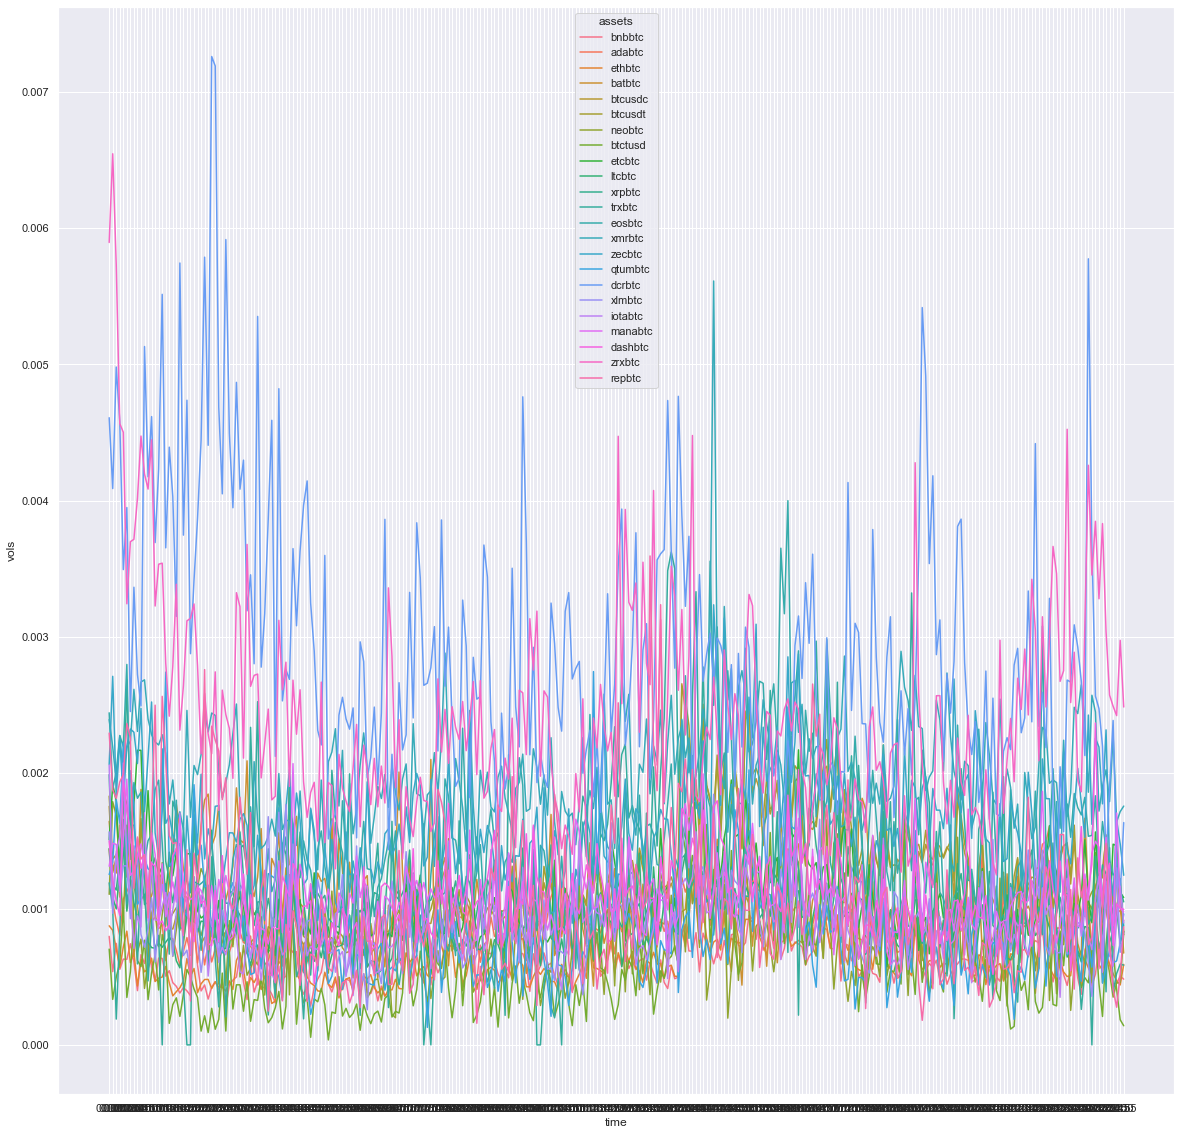

In [129]:
plt = sns.lineplot(data=molten, x='time', y='vols', hue='assets')

In [128]:
plt.xaxis.get_ticklabels()

[Text(3, 0, '00:15')]

In [130]:
for i, label in enumerate(plt.xaxis.get_ticklabels()):
    if i % 12 != 0:
        label.set_visible(False)

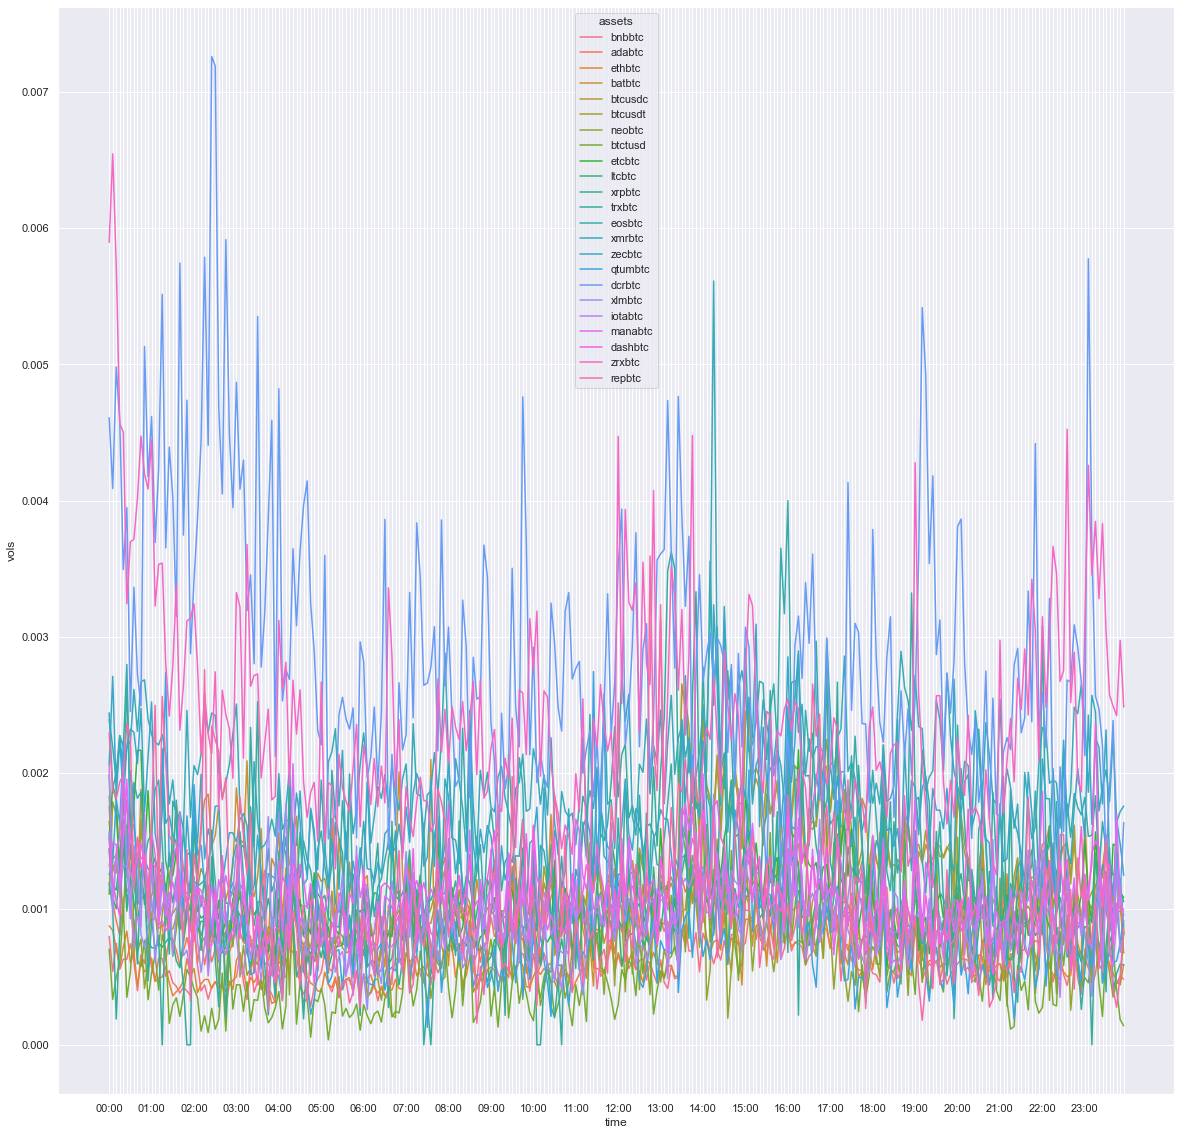

In [131]:
plt.figure